In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("./evdataset.csv")
df2 = pd.read_csv("./ElectricCarData_Clean.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Brand                        194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [4]:
cols = []
for item in df1.columns:
    if str(df1[item].dtype) == 'object':
        # print(item)
        continue
    cols.append(item)
# cols

In [67]:
# cols.remove('Electric Range')
X = df1[cols]
y = df1['Electric Range']

NameError: name 'cols' is not defined

In [130]:
def into_int(s:str):
    try:
        return int(s)
    except:
        return 0

In [313]:
d = df1[['Electric Range',
    'Battery Capacity',
    'Highway - Cold Weather',
    'Combined - Cold Weather',
    'Highway - Mild Weather',
    'Top Speed',
    'Combined - Mild Weather']]

In [95]:
import seaborn as sns

Battery Capacity, 

<Axes: >

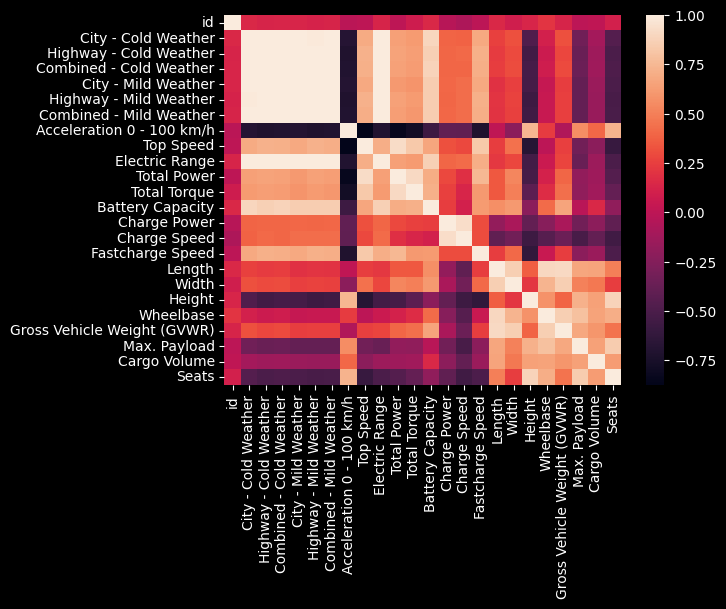

In [9]:
sns.heatmap(df1[cols].corr())

<Axes: >

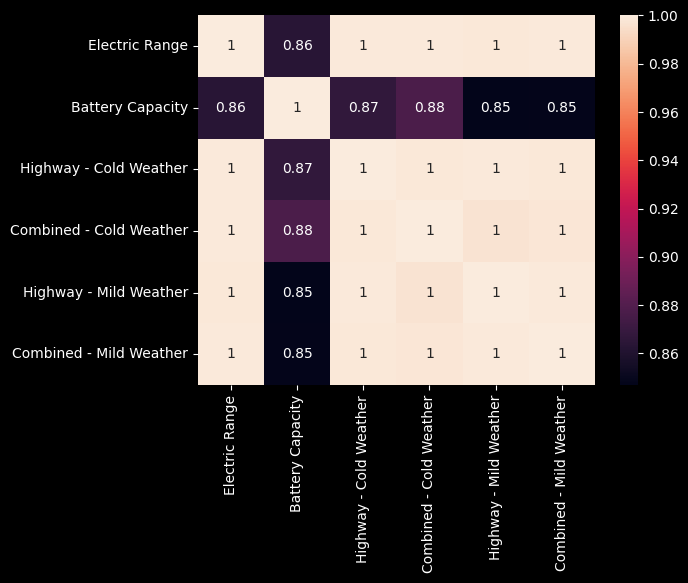

In [10]:
sns.heatmap(d.corr(), annot=True)

In [314]:
X = d[['Battery Capacity','Highway - Cold Weather']]
y = d['Electric Range']

In [315]:
# metric
from sklearn.metrics import r2_score, mean_squared_error

# split data
from sklearn.model_selection import train_test_split

In [316]:
def get_accuracy(model, X, y, r=None):
    X_train, x_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.3, random_state=r)

    model.fit(X_train, y_train)

    y_train_ = model.predict(X_train)
    y_train_r2 = r2_score(y_train_, y_train)
    y_train_error = mean_squared_error(y_train_, y_train)

    y_test_ = model.predict(x_test)
    y_test_r2 = r2_score(y_test_, y_test)
    y_test_error = mean_squared_error(y_test_, y_test)

    return {
        "train_r2" : y_train_r2,
        "test_r2" : y_test_r2,
        "train_mse" : y_train_error,
        "test_mse" : y_test_error
    }


In [317]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
get_accuracy(lr, X, y)

{'train_r2': 0.9985984507216445,
 'test_r2': 0.998163836121856,
 'train_mse': 14.3964853294487,
 'test_mse': 18.66565554817383}

In [320]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
get_accuracy(dt, X,y)

{'train_r2': 0.9725454988249381,
 'test_r2': 0.9585337903372104,
 'train_mse': 283.8593022204134,
 'test_mse': 334.49356399494553}

In [321]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
get_accuracy(rf, X,y)

{'train_r2': 0.9990088937092397,
 'test_r2': 0.9974102349543724,
 'train_mse': 10.622652361116403,
 'test_mse': 21.65756473805708}

In [322]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
get_accuracy(svr, X, y)

{'train_r2': 0.998275093696526,
 'test_r2': 0.998431311136311,
 'train_mse': 16.37969438695595,
 'test_mse': 19.213240074297357}

Testing

In [18]:
test = np.array(X)
x = test[7]
svr.predict(x.reshape(1,2))

array([400.57371481])

In [293]:
def get_range(speed:int):
    res = df2[df2['TopSpeed_KmH'] >= speed]['Range_Km']
    max = res.max()
    min = res.min()

    return {
        "min-Range" : min,
        "max-Range" : max
    }

get_range(300)

{'min-Range': 970, 'max-Range': 970}

In [10]:
def get_speed(r: int):
    res = df2[df2['Range_Km'] <= r]['TopSpeed_KmH']
    max = res.max()
    min = res.min()

    return {
        "min-speed" : min,
        "max-speed" : max
    }


In [131]:
df2['FastCharge_KmH'] = df2['FastCharge_KmH'].apply(into_int)

In [132]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


<Axes: >

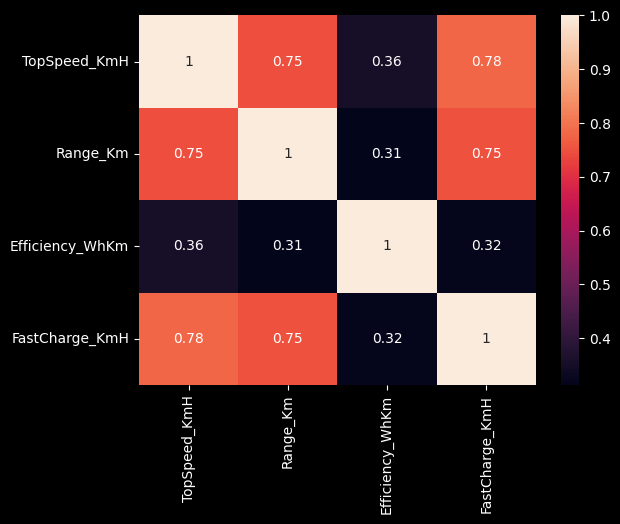

In [305]:
temp = df2[['TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH']]
sns.heatmap(temp.corr(), annot=True)

In [306]:
temp.shape
temp[['Range_Km','Efficiency_WhKm','FastCharge_KmH','TopSpeed_KmH']]

,Range_Km,Efficiency_WhKm,FastCharge_KmH,TopSpeed_KmH
0,450,161,940,233
1,270,167,250,160
2,400,181,620,210
3,360,206,560,180
4,170,168,190,145
...,...,...,...,...
98,330,191,440,160
99,335,258,540,210
100,325,194,440,200
101,375,232,450,200


In [307]:
X = np.array(temp[['Range_Km','Efficiency_WhKm','FastCharge_KmH']])
y = np.array(temp['TopSpeed_KmH']).reshape(-1,1)
dt1 = DecisionTreeRegressor(max_depth=5)

m = [-1,-1]

for i in range(100):
    res = get_accuracy(dt1, X,y, i)

    if m[0] < res['test_r2']:
        m[0] = res['test_r2']
        m[1] = i

print("Max : ", m)

Max :  [0.8375869514861818, 83]


In [309]:
X = np.array(temp[['Range_Km','Efficiency_WhKm','FastCharge_KmH']])
y = np.array(temp['TopSpeed_KmH']).reshape(-1,1)
dt1 = DecisionTreeRegressor(max_depth=5)
get_accuracy(dt1, X,y, 83)

{'train_r2': 0.8968892217078954,
 'test_r2': 0.8397705497323626,
 'train_mse': 193.91392496392493,
 'test_mse': 190.91595945087363}

In [289]:
dt1.predict([[170, 168, 190]])

array([132.])

In [294]:
get_range(132)

{'min-Range': 130, 'max-Range': 970}

In [291]:
get_speed(170)

{'min-speed': 130, 'max-speed': 145}

In [151]:
# to get range by top speed given
df2.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [29]:
df1.drop_duplicates(inplace=True)

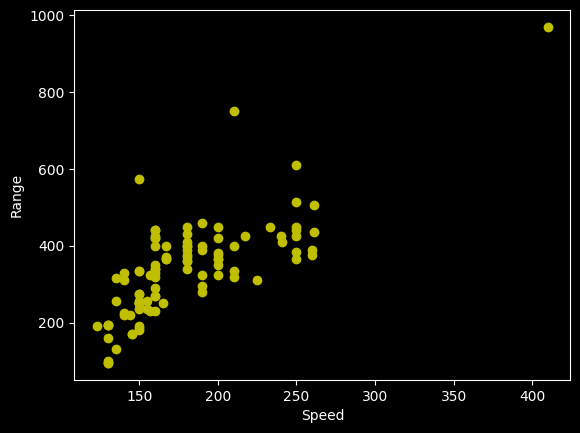

In [312]:
from matplotlib import pyplot as plt
plt.scatter(x=df2['TopSpeed_KmH'], y=df2['Range_Km'], c='y')
plt.ylabel("Range")
plt.xlabel("Speed")

plt.show()

In [60]:
get_speed(200)

{'min-speed': 135, 'max-speed': 410}

In [323]:
# import pickle
# pickle.dump(dt1, open("DT_getTopSpeed_3para.pkl", 'wb'))